# Importing the necessary packages



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Opening CSV files


In [2]:
train = pd.read_csv('/content/drive/MyDrive/Walmart_Sales_Prediction/train.csv')
stores = pd.read_csv('/content/drive/MyDrive/Walmart_Sales_Prediction/stores.csv')
features = pd.read_csv('/content/drive/MyDrive/Walmart_Sales_Prediction/features.csv')

# First Look Towards Data

In [3]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512




# Joining Tables

In [6]:
df = train.merge(features, on=['Store', 'Date','IsHoliday'], how='inner').merge(stores, on=['Store'], how='inner') #merging tables
df


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [7]:
df.shape #Row and Column count

(421570, 16)

#Missing Values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [9]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [10]:
df.fillna(0,inplace=True)

#Store - Department Analysis

In [11]:
df['Store'].nunique() #Unique number of Stores


45

In [12]:
df['Dept'].nunique() #Unique number of Departments


81

Now we check the weekly sales of all stores and departments with respect to each other using Pivot Tables

In [13]:
pivot_store_dept = pd.pivot_table(df, values='Weekly_Sales', index=['Store'], columns=['Dept'], aggfunc=np.mean)
pivot_store_dept

/tmp/ipython-input-1580381105.py:1: FutureWarning: The provided callable <function mean at 0x7a1aa5564220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_store_dept = pd.pivot_table(df, values='Weekly_Sales', index=['Store'], columns=['Dept'], aggfunc=np.mean)


Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


The store numbers are from 1-45 but the department numbers are from 1-99. That means there are missing department numbers since there are only 81 departments.

There are missing values and values which are in negative and it is not possible for a store's department to go on with 0 sales or sales in negative for over a week.

In [14]:
df.loc[df['Weekly_Sales']<= 0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,0.0,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,0.00,0.0,0.00,0.00,0.00,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,0.00,0.0,0.00,0.00,0.00,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,0.00,0.0,0.00,0.00,0.00,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,0.00,0.0,0.00,0.00,0.00,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,0.00,0.0,0.00,0.00,0.00,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,0.00,0.0,0.00,0.00,0.00,182.318780,8.743,B,118221


Out of 421570, 1358 rows are values of either negative or zero weekly department sales. Since its a small portion of the data we can clean it by dropping those rows.

In [15]:
df.drop(df.loc[df['Weekly_Sales']<= 0].index, inplace=True)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [16]:
df.shape

(420212, 16)

The new total number of rows are 420212


# Weekly Sales Analysis - Holiday Season

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

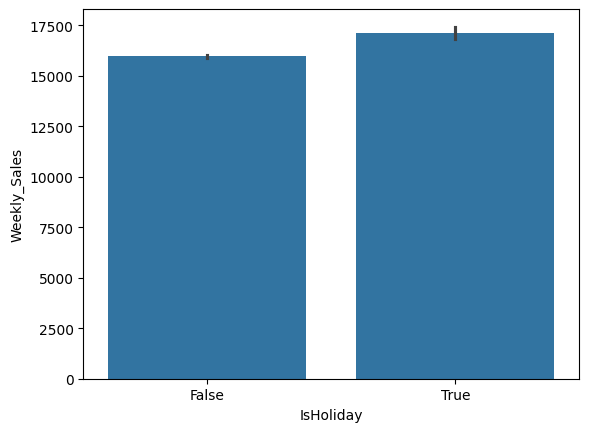

In [17]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [18]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [19]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['IsHoliday'].count()

np.int64(390652)

#Date Analysis



In [20]:
df['Date'].head()

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05


In [21]:
df['Date'].tail()

,Date
421565,2012-09-28
421566,2012-10-05
421567,2012-10-12
421568,2012-10-19
421569,2012-10-26


The data is spanned from 2010-02-05 to 2012-10-26

# Size - Type Relation


In [22]:
df.groupby('Type').describe()['Size'].round(2)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,214961.0,182225.39,41532.66,39690.0,158114.0,202505.0,203819.0,219622.0
B,162787.0,101796.84,30944.31,34875.0,93188.0,114533.0,123737.0,140167.0
C,42464.0,40536.10,1194.69,39690.0,39690.0,39910.0,41062.0,42988.0


<Axes: xlabel='Type', ylabel='Size'>

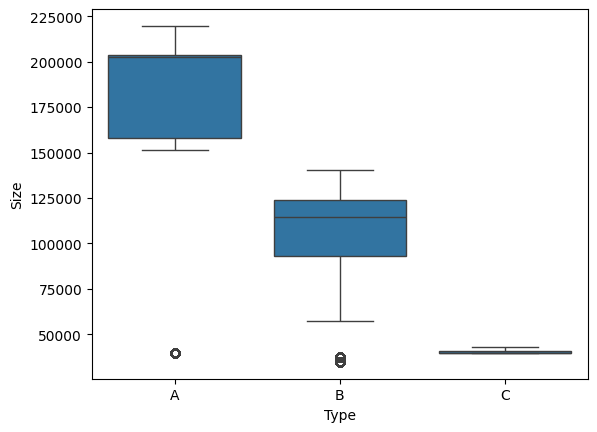

In [23]:
sns.boxplot(x='Type', y='Size', data=df)

# Weekly Sales Analysis - Department

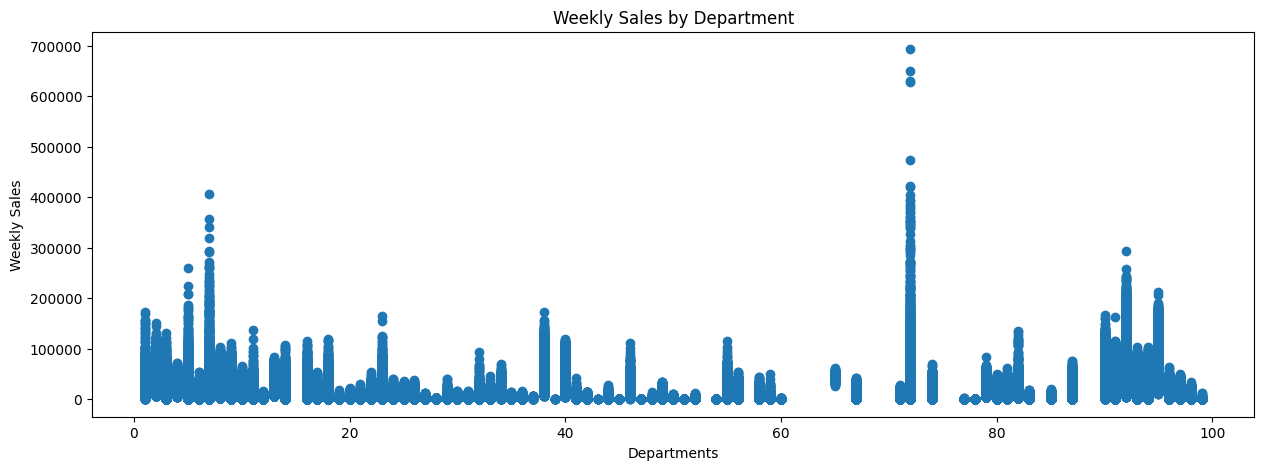

In [24]:
#Weekly Sales by Department
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

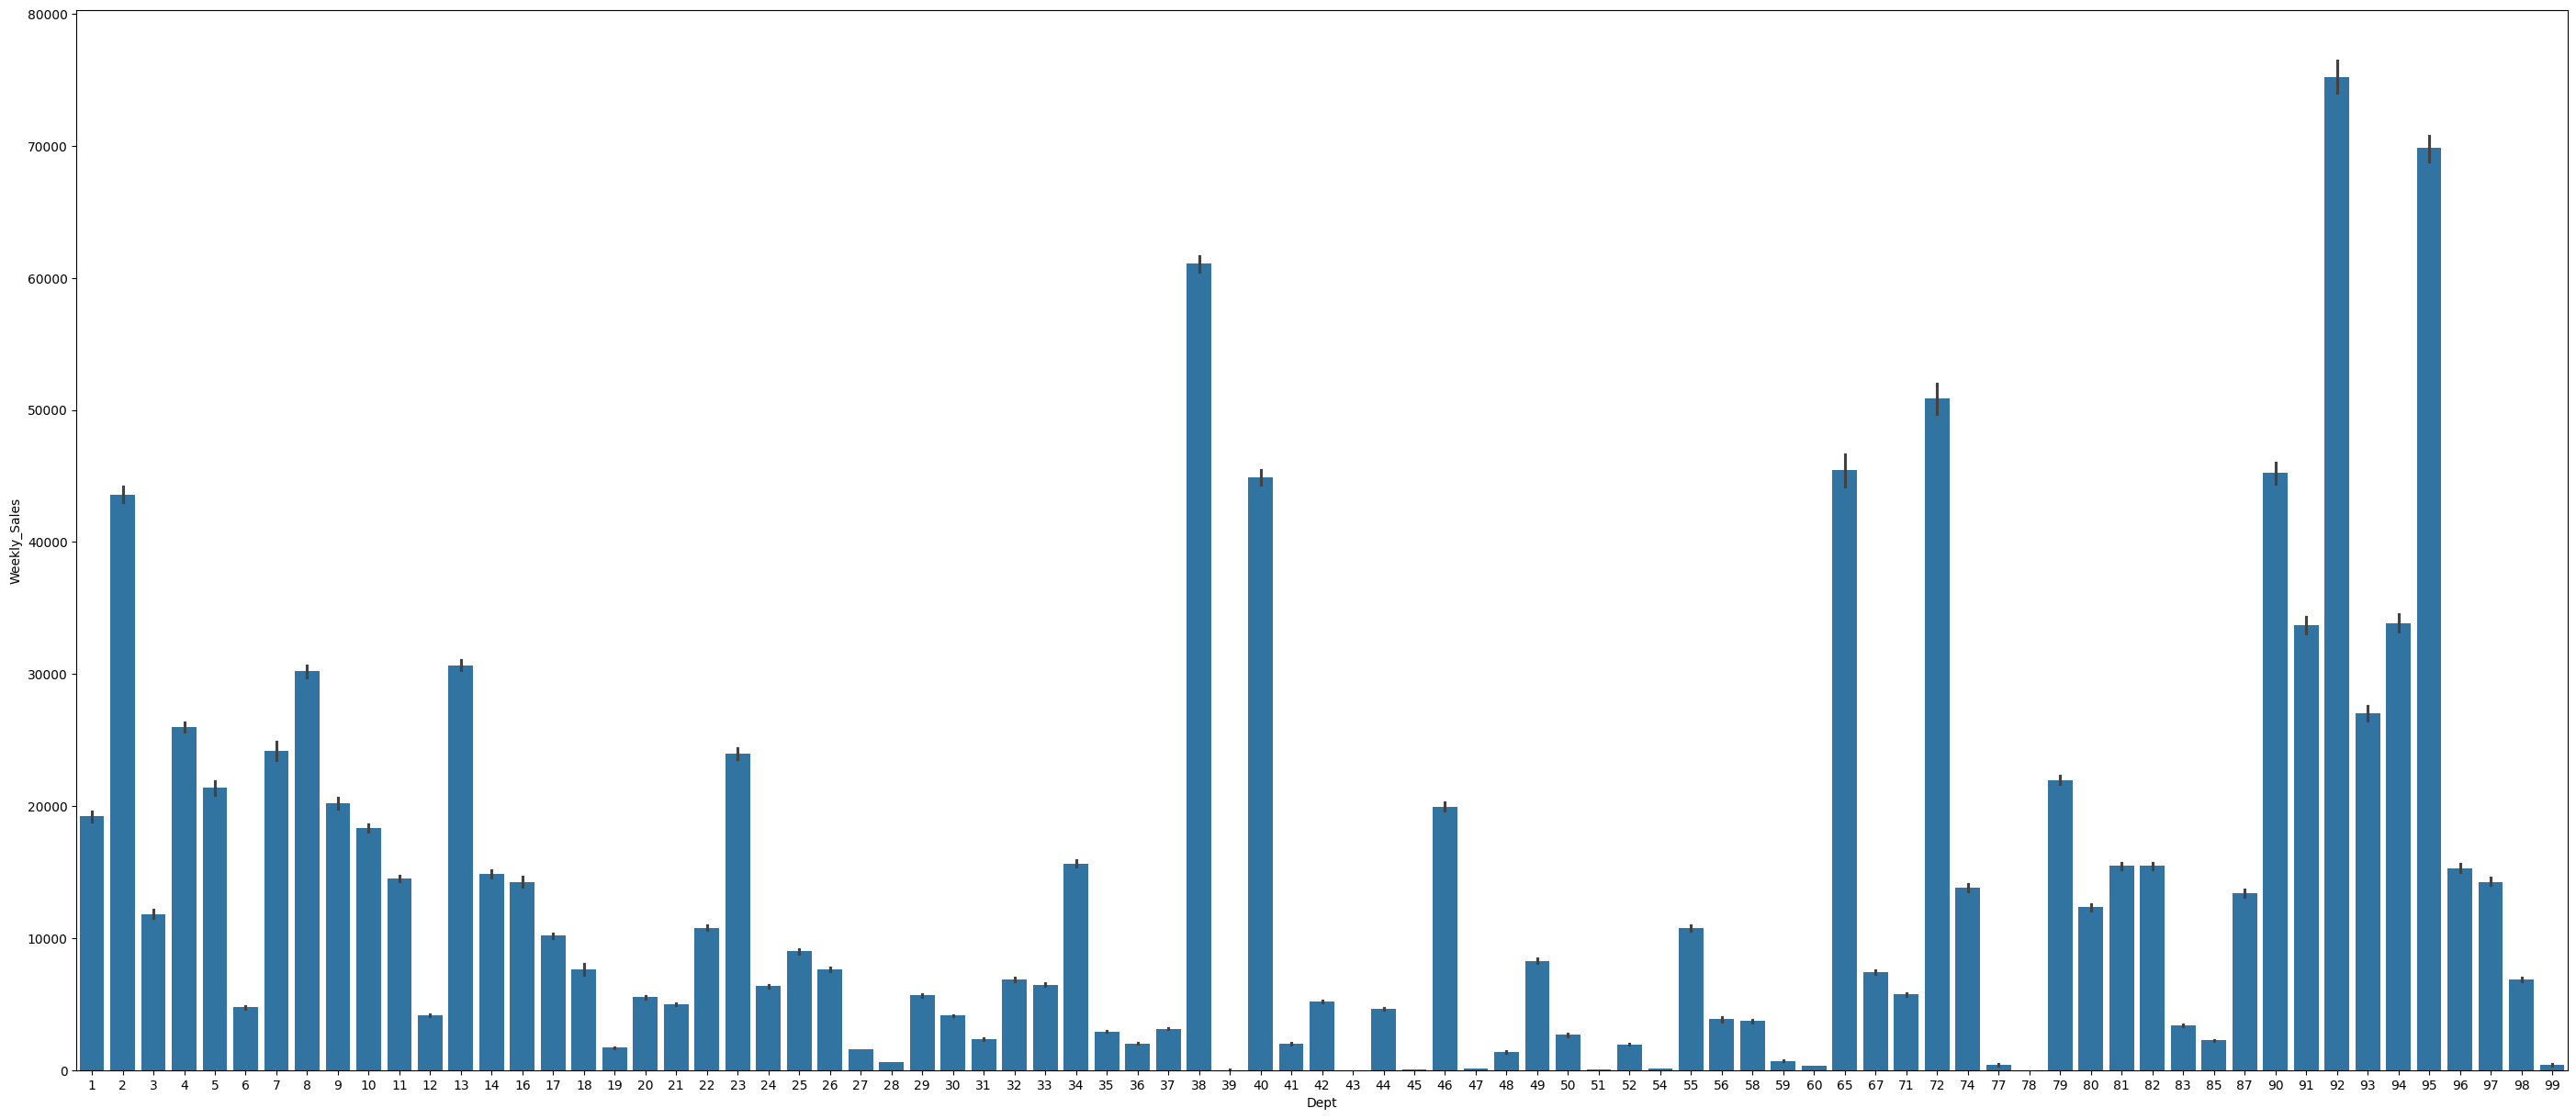

In [25]:
plt.figure(figsize=(35,15))
sns.barplot(x='Dept', y='Weekly_Sales', data=df)

# Weekly Sales Analysis - Stores


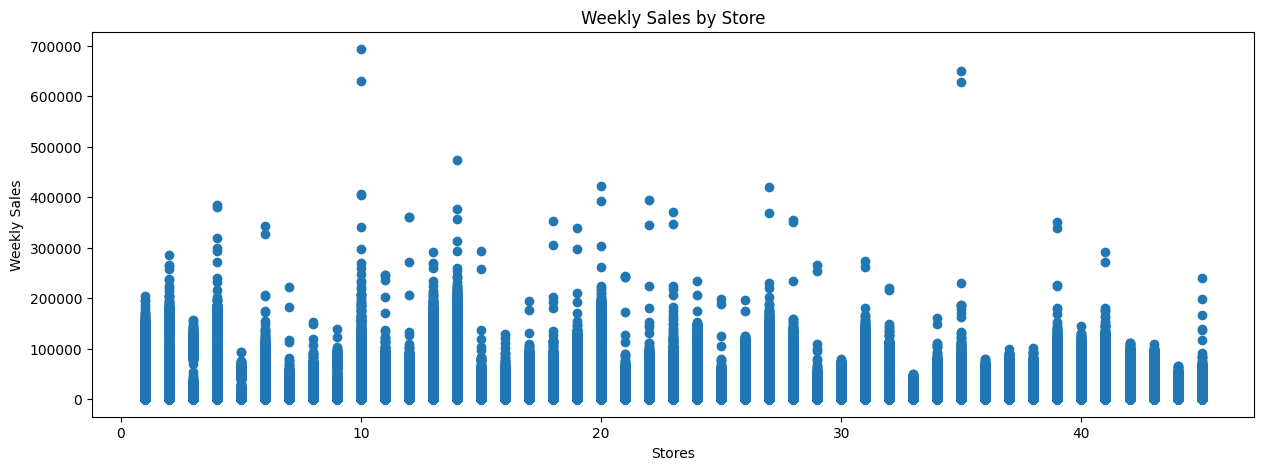

In [26]:
#Weekly Sales by Stores
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

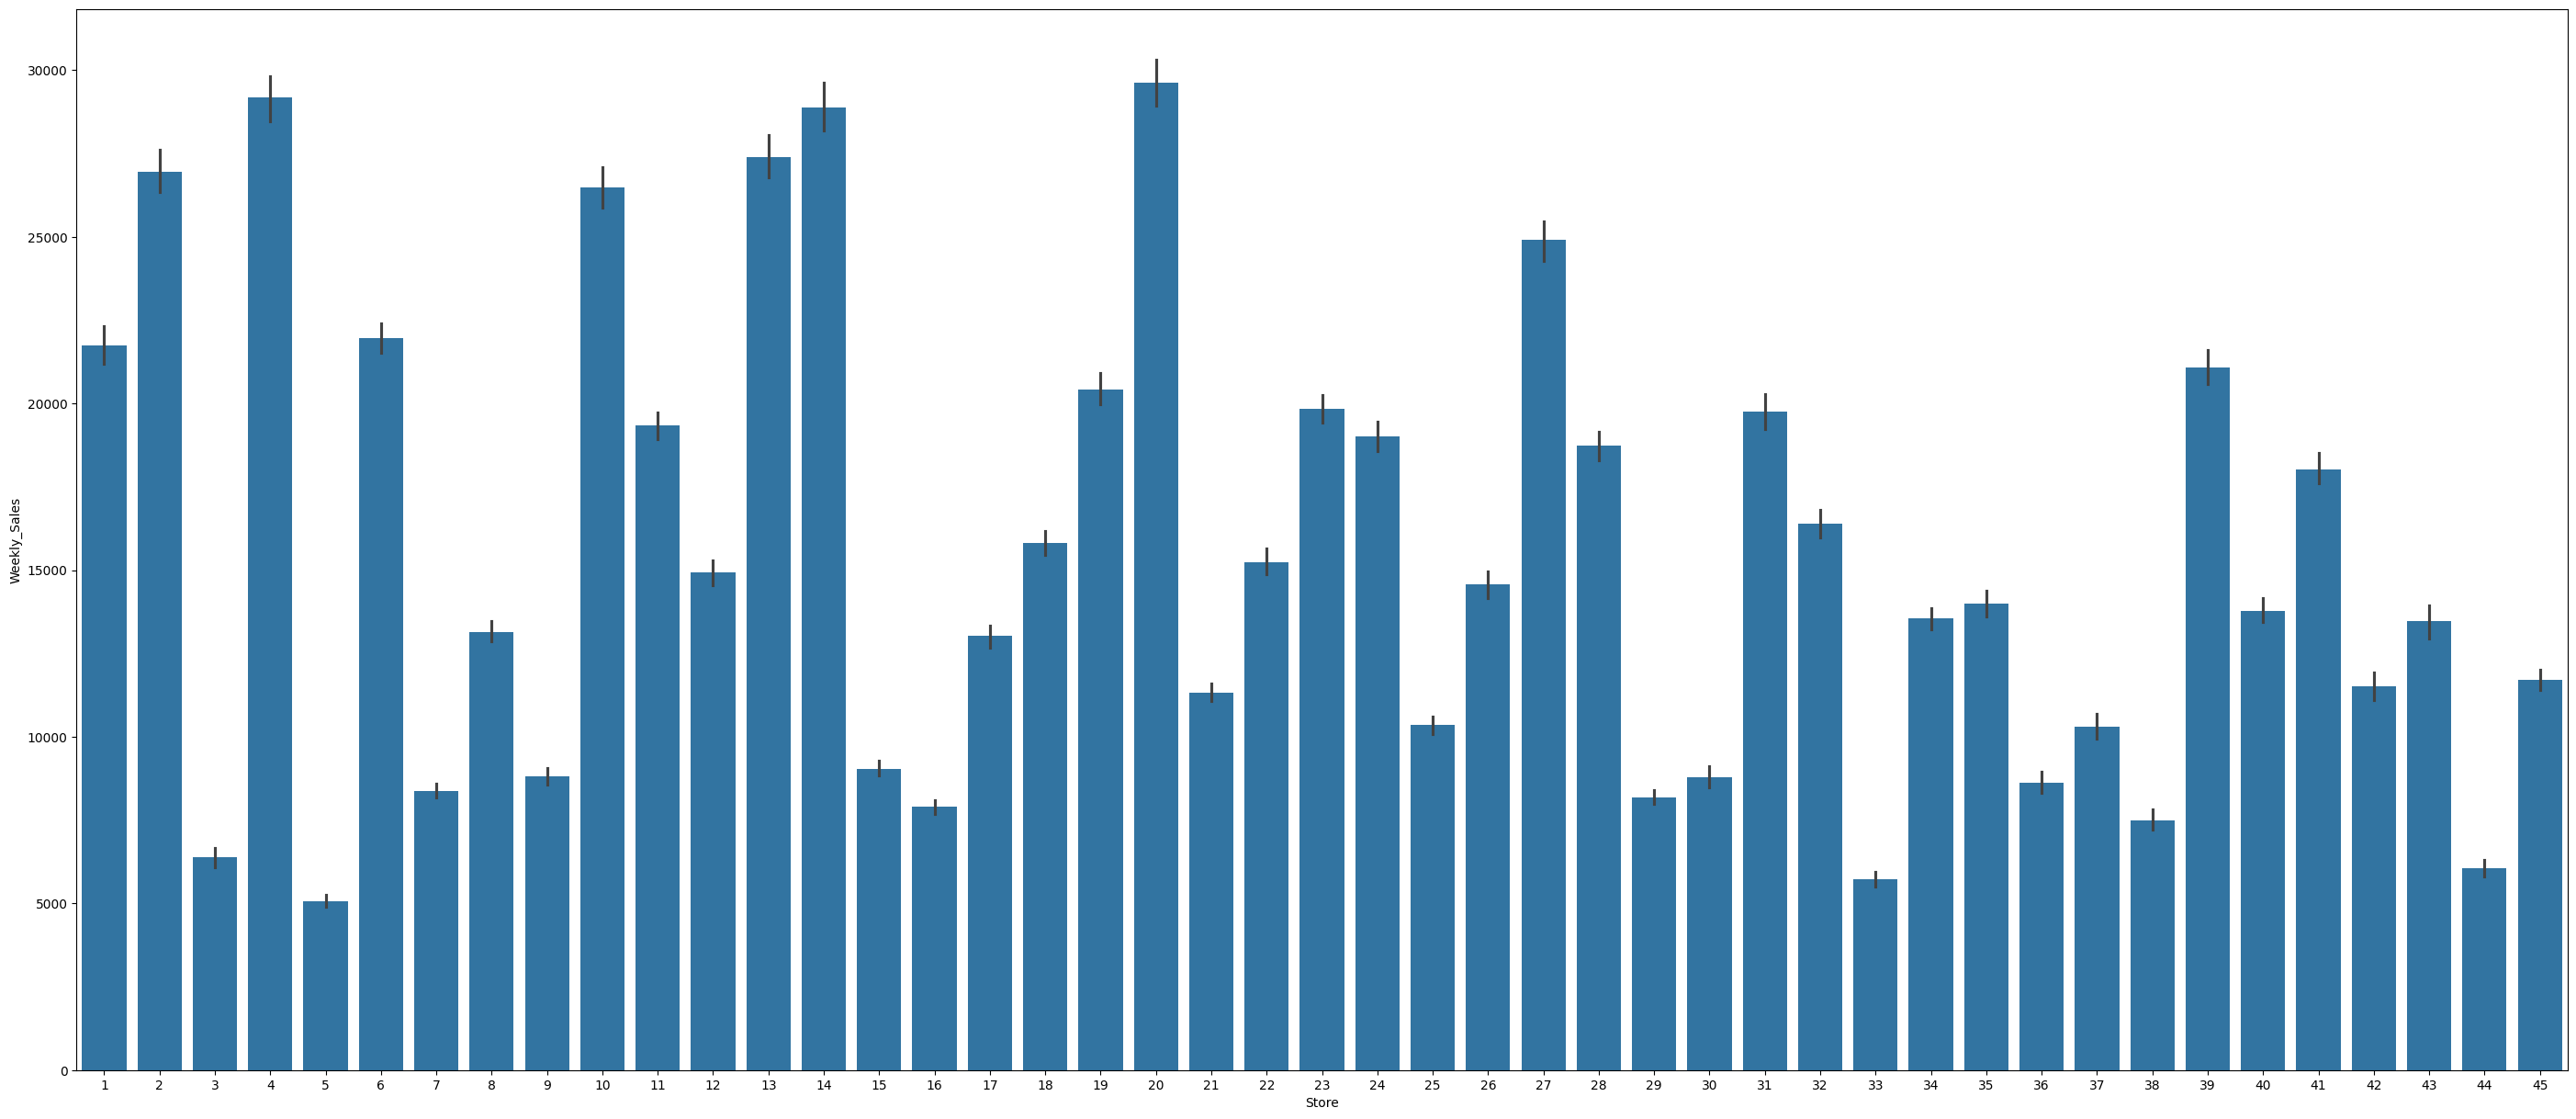

In [27]:
plt.figure(figsize=(35,15))
sns.barplot(x='Store', y='Weekly_Sales', data=df)

# Weekly Sales Analysis - Dates

In [28]:
#Adding new columns for Year, Month and Week
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.isocalendar().week
df['month'] =df['Date'].dt.month
df['year'] =df['Date'].dt.year
df['dayofweek'] = df['Date'].dt.dayofweek
df['Type'] = df['Type'].map({'A': 1, 'B': 2, 'C': 3})

<Axes: xlabel='month'>

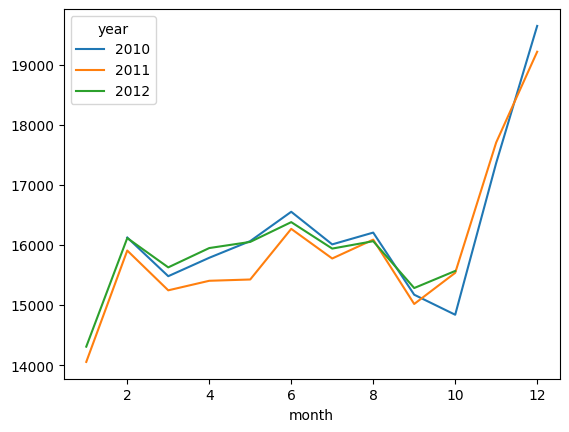

In [29]:
#Avg Monthly Sales
sales_month = df.groupby('month')['Weekly_Sales'].mean()
sales_month
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

,Weekly_Sales
year,
2010,16318.648285
2011,16007.797985
2012,15748.265005


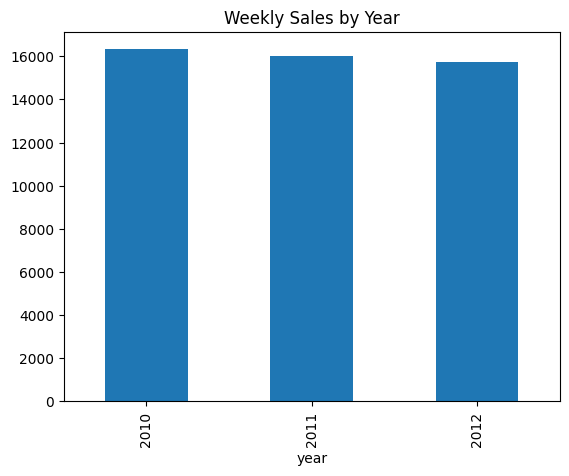

In [30]:
#Avg Yearly Sales
sales_year = df.groupby('year')['Weekly_Sales'].mean()
sales_year.plot(kind='bar', title = 'Weekly Sales by Year')
sales_year

<Axes: xlabel='week'>

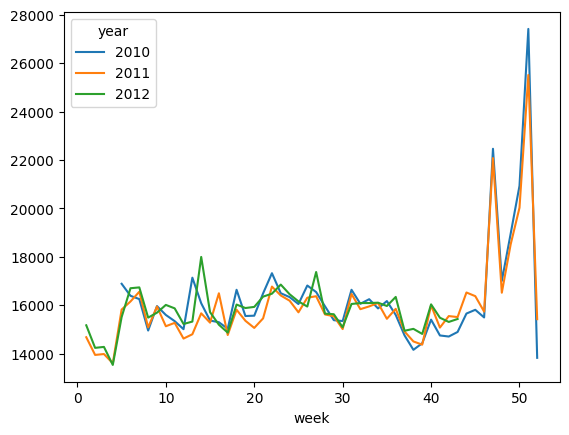

In [31]:
#Avg Weekly Sales
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

#Weekly Sales Analysis - Fuel Price

<Axes: xlabel='Fuel_Price'>

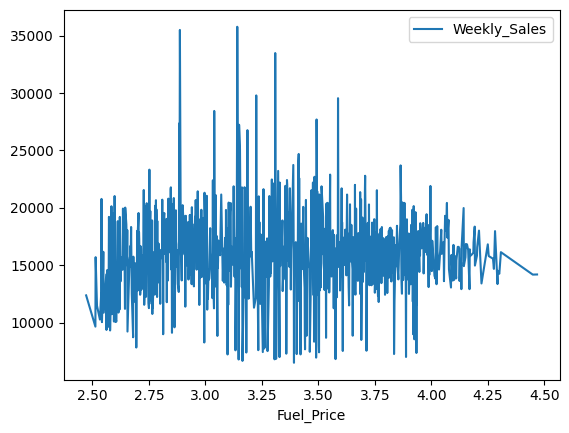

In [32]:
fuel_price = pd.pivot_table(df, values = 'Weekly_Sales',index = 'Fuel_Price')
fuel_price.plot()

The graph shows that there is no relation between the Fuel Price and Weekly Sales

#Weekly Sales Analysis - CPI

<Axes: xlabel='CPI'>

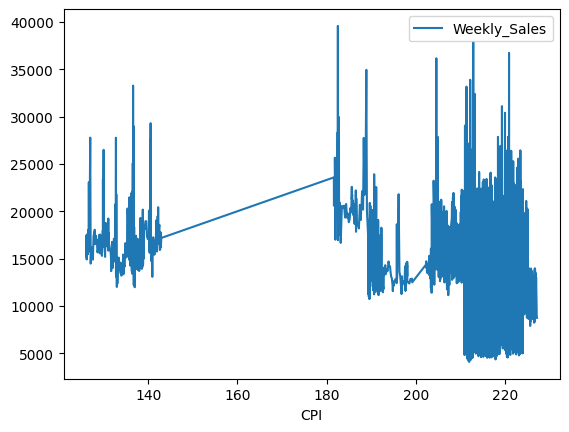

In [33]:
CPI = pd.pivot_table(df, values = 'Weekly_Sales',index = 'CPI')
CPI.plot()

The graph shows that there is no relation between the CPI and Weekly Sales

#Weekly Sales Analysis - Temperature

<Axes: xlabel='Temperature'>

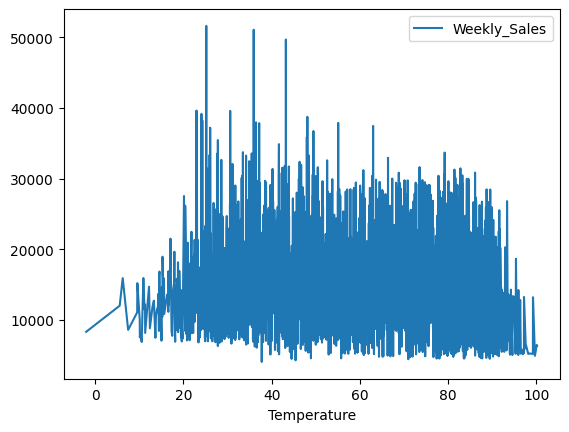

In [34]:
temp = pd.pivot_table(df, values = 'Weekly_Sales',index = 'Temperature')
temp.plot()

The graph shows that there is no relation between the Temperature and Weekly Sales

# Features Definition

In [35]:
y = df['Weekly_Sales']
X = df.drop(['Weekly_Sales','Date','IsHoliday'],axis = 1)

# Train - Validate Split


In [36]:
train_data = df.iloc[:-450]
val_data = df.iloc[-450:]
X_train = train_data.drop(['Weekly_Sales','Date','IsHoliday'],axis = 1)
y_train = train_data['Weekly_Sales']

X_val = val_data.drop(['Weekly_Sales','Date','IsHoliday'],axis = 1)
y_val = val_data['Weekly_Sales']

# Linear Regression

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

# Calculate RMSE by taking the square root of the MSE
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
r2_lr = r2_score(y_val, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression RMSE: 23396.05495186163
Linear Regression R²: -0.012339592657089282




*   RMSE - Average prediction error (in sales units) and Lower value is better
*   R2 - How much of sales variation is explained and Closer to 1 is better











# Random Forest Regression


In [38]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)

Random Forest RMSE: 5725.028613892463
Random Forest R²: 0.9393827429886523


# Model Performance

In [39]:

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_rf],
    'R² Score': [r2_lr, r2_rf]
})
results

,Model,RMSE,R² Score
0,Linear Regression,23396.054952,-0.012340
1,Random Forest,5725.028614,0.939383


# Feature Importance

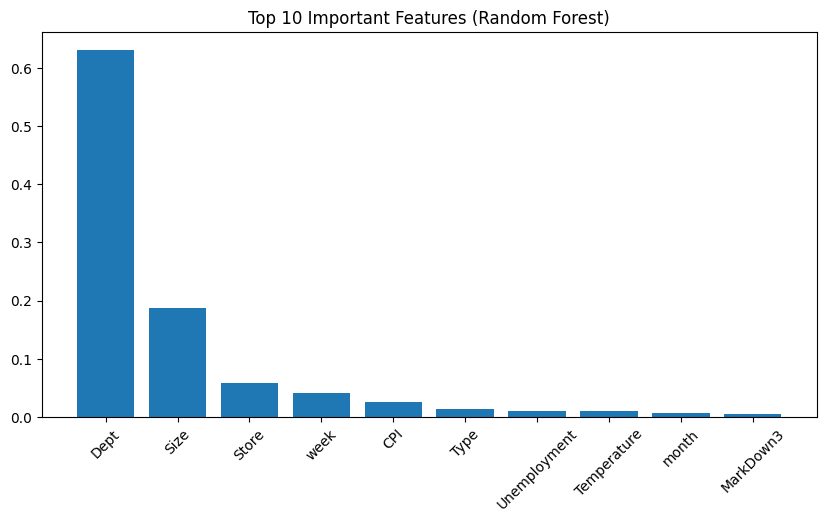

In [40]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Top 10 Important Features (Random Forest)")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [X_train.columns[i] for i in indices[:10]], rotation=45)
plt.show()

In [41]:
imp_rf = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False).head(20)
imp_rf

,feature,importance
1,Dept,0.630321
12,Size,0.187703
0,Store,0.057936
13,week,0.041160
9,CPI,0.026522
11,Type,0.013861
10,Unemployment,0.010484
2,Temperature,0.010245
14,month,0.006483
6,MarkDown3,0.005183


#Actual vs Predicted Plot

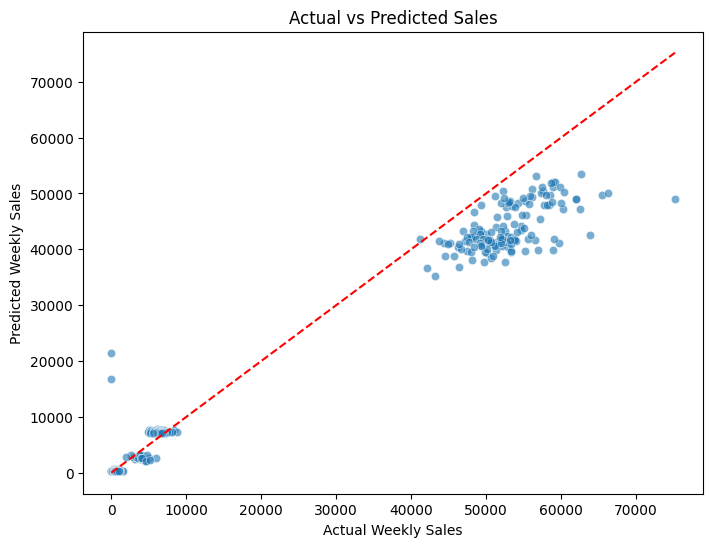

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_val, y=y_pred_rf, alpha=0.6)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()

# Plot of Residuals


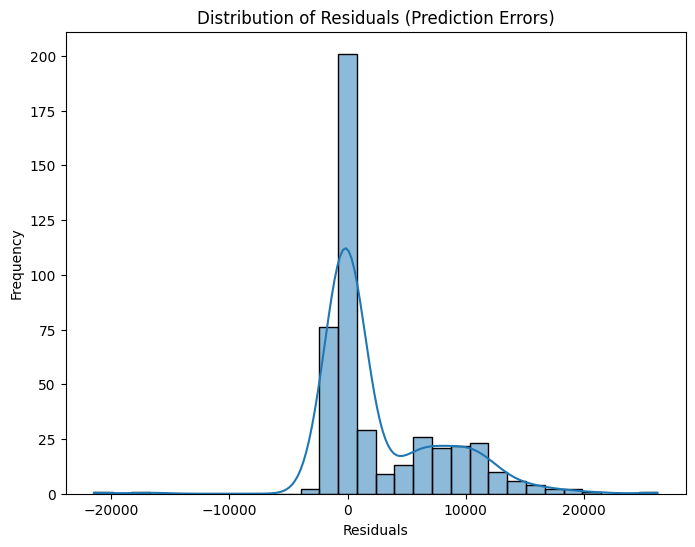

In [43]:
residuals = y_val - y_pred_rf
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals (Prediction Errors)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


# Actual Sales vs Predicted Sales

In [44]:
results_df = pd.DataFrame({"Actual Sales": y_val, "Predicted Sales": y_pred_rf})
display(results_df.head(10))  # show first 10 predictions

,Actual Sales,Predicted Sales
421120,3109.40,2736.8046
421121,3123.83,2405.7782
421122,3800.78,2475.5163
421123,5918.72,2638.0801
421124,2878.50,2817.2945
421125,3521.59,2683.8124
421126,3226.48,2753.6882
421127,3327.28,2771.0585
421128,2633.76,3124.3140
421129,3688.13,3157.0742


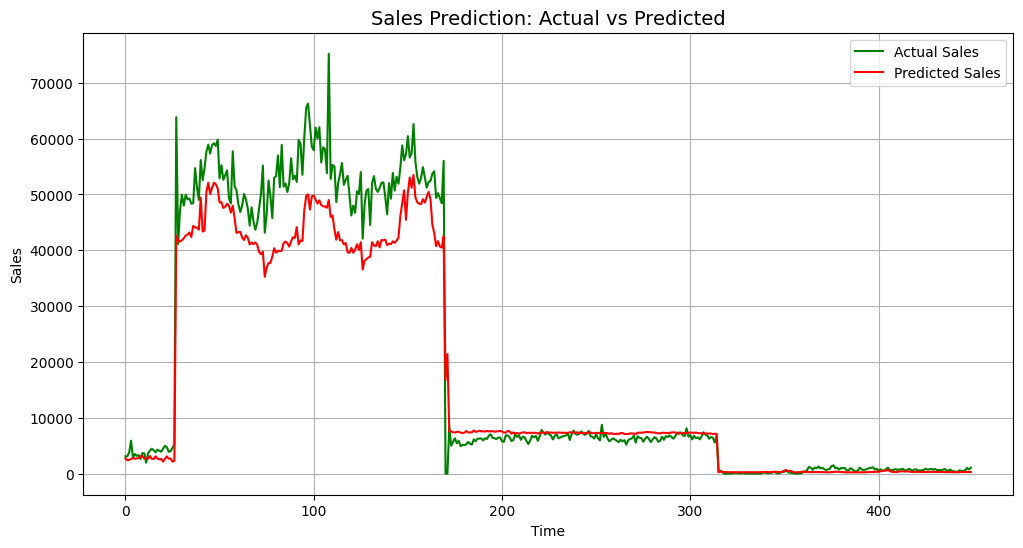

In [45]:

plt.figure(figsize=(12, 6))
plt.plot(results_df["Actual Sales"].values, label="Actual Sales", color='green')
plt.plot(results_df["Predicted Sales"].values, label="Predicted Sales", color='red')
plt.title("Sales Prediction: Actual vs Predicted", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()